<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [3]:
# Load dataset
breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv, index_col='id')

### 2. EDA 

Explore dataset. Check for nulls. Make the target column binary.

In [4]:
# Head
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# Shape
breast_cancer.shape

(569, 32)

In [6]:
# Descriptive statistics
breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
# Df summary
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [8]:
# Missing values
breast_cancer.isna().sum().sum()

569

In [9]:
# Remove feature w/ NaNs
breast_cancer.drop(labels='Unnamed: 32', axis=1, inplace=True)

In [10]:
# Missing values
breast_cancer.isna().sum().sum()

0

In [11]:
# Replace white spaces w/ _
breast_cancer.columns = breast_cancer.columns.str.replace(' ', '_')

In [12]:
# Percentage diagnosis values
breast_cancer['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [13]:
# Map diagnosis values: benign to 0 and malignant to 1
bm_map = {'B': 0, 'M': 1}

breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map(bm_map)

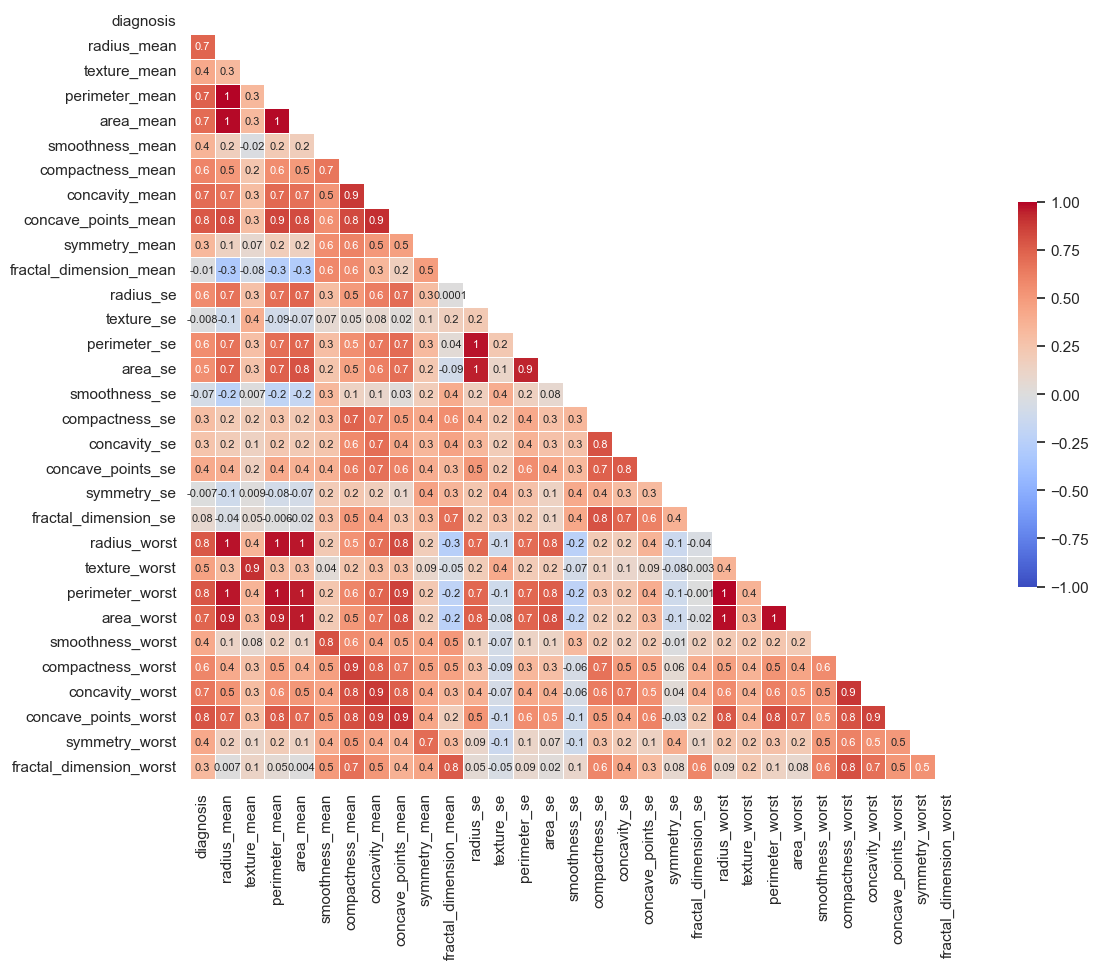

In [14]:
# Correlation heatmap
sns.set_theme(style="white")
plt.figure(figsize=(15,10))

# Generate mask for upper triangle
mask = np.zeros_like(breast_cancer.corr(), dtype=bool) #generate mask of "0's"
mask[np.triu_indices_from(mask)] = True #return upper triangle
# Set diverging colormap
cmap = sns.color_palette('coolwarm', as_cmap=True)
# Draw heatmap with mask and correct aspect ratio
sns.heatmap(breast_cancer.corr(), mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, fmt='.1g',
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 8}, annot=True);

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

In [34]:
target_col = 'diagnosis'
feature_cols = [c for c in breast_cancer.columns if c != target_col]

X = breast_cancer[feature_cols]
y = breast_cancer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LogisticRegression(max_iter=10000).fit(X_train, y_train)

print(f'accuracy logreg (train) = {lr.score(X_train, y_train):7.4f}')
print(f'accuracy logreg (test) = {lr.score(X_test, y_test):7.4f}')

accuracy logreg (train) =  0.9598
accuracy logreg (test) =  0.9766


In [35]:
# Computed intercept
lr.intercept_

array([-31.53143557])

In [36]:
# Computed coefficients
lr.coef_

array([[-1.04460297, -0.23423319,  0.39326469, -0.02631476,  0.14314621,
         0.22965066,  0.52628642,  0.28993367,  0.22517608,  0.03803079,
         0.12634608, -1.38475684, -0.44938897,  0.14573804,  0.02014815,
        -0.01728743,  0.06286398,  0.03742224,  0.04215469, -0.00192341,
        -0.04771413,  0.50928371,  0.05882023,  0.01107156,  0.2902358 ,
         0.68428433,  1.36620217,  0.51906403,  0.7276533 ,  0.09637691]])

In [39]:
# Create df with features and respective coefficients (sorted by absolute values)
df = pd.DataFrame({'feature': feature_cols, 'coef': lr.coef_[0], 'abs_coef': np.abs(lr.coef_[0])})
df.sort_values(by='abs_coef', inplace=True, ascending=False)
df.head(10)

,feature,coef,abs_coef
11,texture_se,-1.384757,1.384757
26,concavity_worst,1.366202,1.366202
0,radius_mean,-1.044603,1.044603
28,symmetry_worst,0.727653,0.727653
25,compactness_worst,0.684284,0.684284
6,concavity_mean,0.526286,0.526286
27,concave_points_worst,0.519064,0.519064
21,texture_worst,0.509284,0.509284
12,perimeter_se,-0.449389,0.449389
2,perimeter_mean,0.393265,0.393265


In [44]:
## Performing cross-validation
# Model
logreg = LogisticRegression(max_iter=10000)

# Cross validation
scores = cross_val_score(logreg, breast_cancer[feature_cols], breast_cancer[target_col], cv=10)
scores

array([0.98245614, 0.9122807 , 0.92982456, 0.94736842, 0.98245614,
       0.98245614, 0.92982456, 0.94736842, 0.96491228, 0.96428571])

In [47]:
print(f'{scores.mean():0.2f} mean accuracy with a standard deviation of {scores.std():0.2f}')

0.95 mean accuracy with a standard deviation of 0.02


#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [83]:
# predict test class:
y_pred_test = lr.predict(X_test)

# predicted test probability:
y_pred_proba = lr.predict_proba(X_test)

In [84]:
y_pred_test[:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [85]:
y_pred_proba[:5, 1] #first 5 probabilities for label 1 (malignant)

array([1.38264407e-01, 9.99999953e-01, 9.98248711e-01, 1.25707170e-03,
       2.23834653e-04])

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

Convert confusion_matrix to a dataframe. 

    index=['predicted_healthy', 'predicted_cancer']
    columns=['is_healthy', 'is_cancer']

In [86]:
# ANSWER
confusion = metrics.confusion_matrix(y_test, y_pred_test)
print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[106   2]
 [  2  61]]


In [87]:
df = pd.DataFrame(confusion, columns=['is_healthy', 'is_cancer'], index=['predicted_healthy', 'predicted_cancer'])
df

,is_healthy,is_cancer
predicted_healthy,106,2
predicted_cancer,2,61


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [34]:
# ANSWER
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_test))

0.9766081871345029
0.9766081871345029


#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [35]:
# ANSWER
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_test))

0.023391812865497075
0.023391812865497075


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [57]:
# ANSWER
sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_test, pos_label=1))

0.9682539682539683
0.9682539682539683


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [58]:
# ANSWER
specificity = TN / (TN + FP)
print(specificity)

0.9814814814814815


#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [38]:
# ANSWER
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.018518518518518517
0.01851851851851849


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [39]:
# ANSWER
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_test))

0.9682539682539683
0.9682539682539683


#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [81]:
# ANSWER
# Get the predicted probability vector and explicitly name the columns
pd.DataFrame(y_pred_proba, columns=['class_0_pp', 'class_1_pp']).head()

,class_0_pp,class_1_pp
0,8.617356e-01,0.138264
1,4.745571e-08,1.000000
2,1.751289e-03,0.998249
3,9.987429e-01,0.001257
4,9.997762e-01,0.000224


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

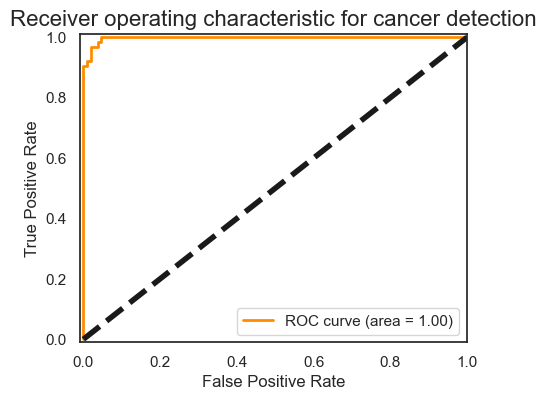

In [80]:
# For class 1, find the area under the curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba[:,1]) #_: threshold
roc_auc = metrics.auc(fpr, tpr)
    
# Plot ROC curve for class 1 (has_cancer)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver operating characteristic for cancer detection', fontsize=16)
plt.legend(loc="lower right");

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



